In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tkinter.filedialog import askopenfilename
import IPython.display as ipd
%matplotlib inline

# Pick a WAV file to look at

Put the .wav files in "syntheGAN/data/raw" and pick the .wav file to open using the below files chooser.

I found out VS Code doesn't play .wav files natively with any iPython or similar solutions, but found the extension [wav-preview](https://marketplace.visualstudio.com/items?itemName=sukumo28.wav-preview) which allows you to preview and visualize some basic analysis from within VS Code.

In [2]:
wav_filepath = askopenfilename(initialdir=os.path.join(os.getcwd(), "..", 'data', 'raw'), filetypes={("WAV files", '*.wav')})
print(wav_filepath)

C:/Users/andrewt02/Documents/Python_Scripts/synthegan/data/raw/80s_synth_samples/multisamples/DX Lead/80s_DXlead_C2.wav


OR enter it manually:

In [10]:
wav_filepath = r"C:\Users\andrewt02\Documents\Python_Scripts\synthegan\data\raw\80s_synth_samples\bass_loops\140bpm\80s_FairliBassA[140]-A.wav"

If in Jupyter lab and not in VS Code you can display and play the clip right in the notebook.

In [11]:
ipd.Audio(wav_filepath) # load a local WAV file

## Trying out Librosa

Discover librosa as a python library built for analysing/working with audio files - [librosa](https://librosa.org/doc/latest/index.html) with a sample notebook showing some of it's functionality [HERE](https://musicinformationretrieval.com/ipython_audio.html).

First, load the WAV file from above.

In [12]:
x, sr = librosa.load(wav_filepath)

Generate a simple interactive wave plot (ensure ipympl is installed for interactivity.

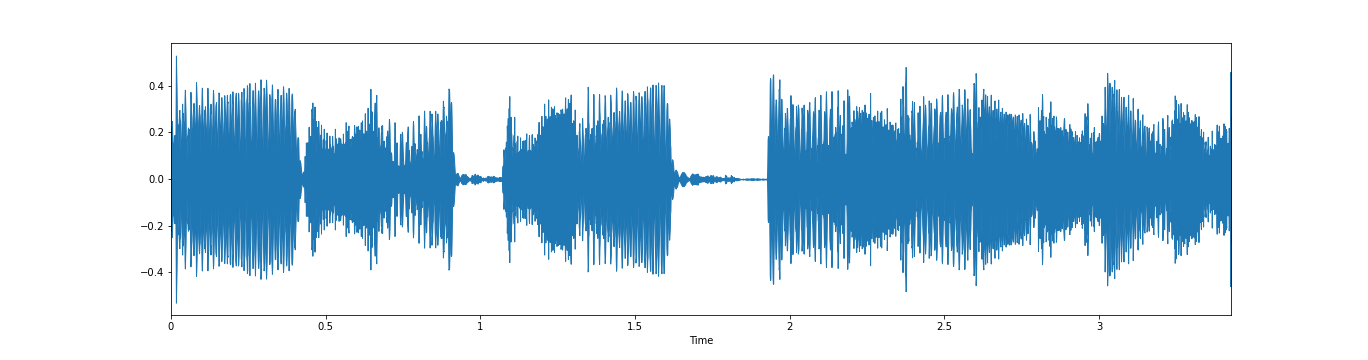

In [14]:
%matplotlib widget
plt.figure(figsize=(19, 5))
librosa.display.waveplot(x, sr=sr)

Display a spectrogram using librosa.display.specshow:

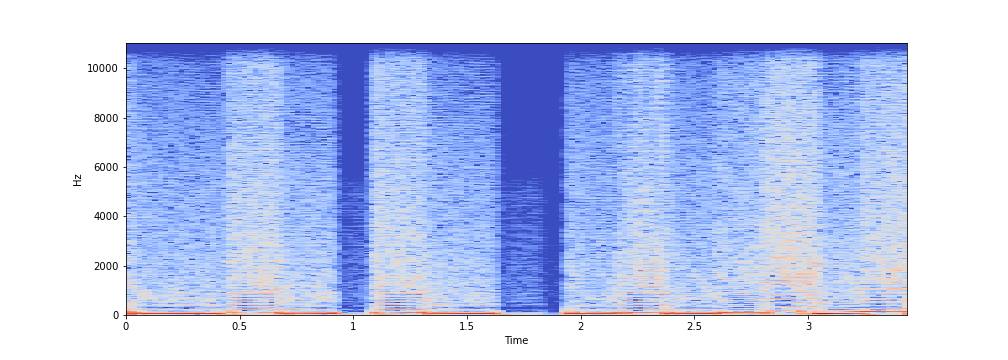

In [15]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

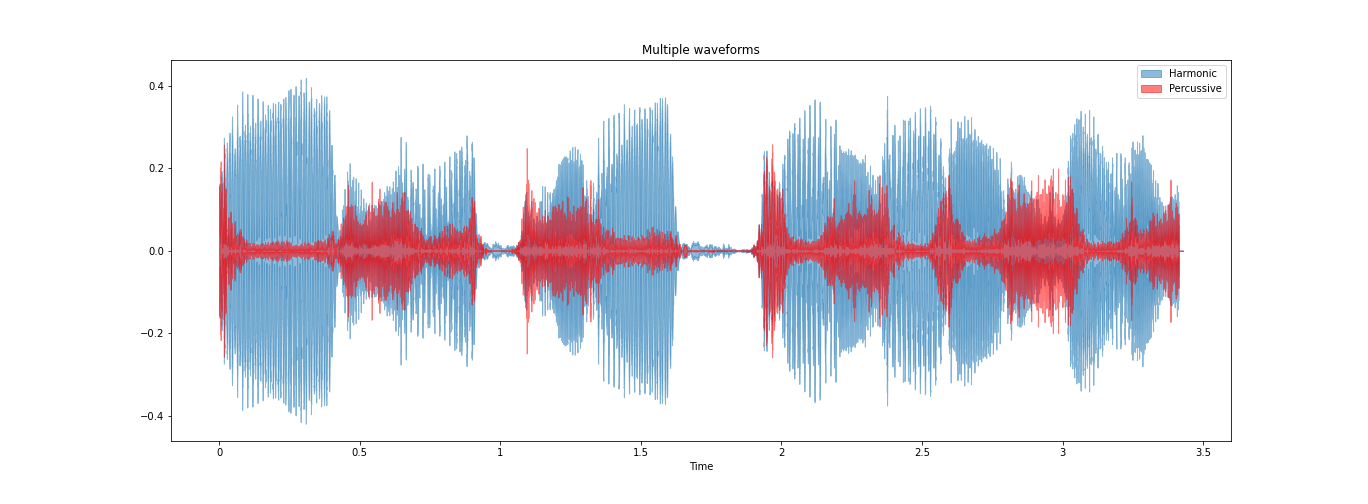

In [17]:
fig, ax = plt.subplots(nrows=1, figsize=(19,7))
# y, sr = librosa.load(librosa.ex('choice'), duration=10)
y_harm, y_perc = librosa.effects.hpss(x)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set(title='Multiple waveforms')
ax.legend()

plt.show()